# Pymaceuticals Inc.
---

### Analysis

After reviewing the data collected from our last study on SCC and the performance of Capomulin, I am pleased the report the following summary information which is supplemented by the technical tables and figures below:

- Capomulin achieved average tumor sizes (both mean and median) approximately between 40.5mm - 41.5mm. This average result is slightly smaller than the starting tumor size selected for the study(45mm), indicating general improvement for the Capomulin cohort. Aside from Ramicane, all other treatments resulted in average tumor sizes larger than the starting size of 45mm.

- Capomulin achieved the second smallest variance and standard deviation among all drug regiments. Ramicane performed slightly better.

- Mice treated with Capomulin demonstrated high likelihood to survive to the end of the study. The Capomulin cohort provided the most timepoints during the study out of any treatment, followed by Ramicane.

- Final tumor sizes for the Capomulin cohort show promising results, with mice between the 25th and 75th percentiles seeing significant reduction in tumor size. The cohort also did not experience any outliers from the study. Ramicane was again a strong competitor to Capomulin, while other selected treatments demonstrate a strong contrast in performance (see below).

- The general trendline for a mouse on Capomulin is sharply down, though the figure contstructed below does indicate some tumor growth before a significant drop. This may indicate that the Capomulin treatment needs some time to begin working in the affected animal before results are evident. It may also be necessary for levels of Capomulin to build up over time in a subject before results become evident.

- There appears to be a nearly 85% correlation to the weight of a mouse and its average observed tumor size. We cannot draw any definitive causation related conclusions from this, however. It may simply be that larger mice tend to have larger tumors.

- Among all the drug regimens tested, Ramicane is the only serious competitor to Capomulin. Further intensive comparative study between the two may be necessary to uncover any potential key differences, or to improve Capomulin's performance again the Ramicane treatment.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_study['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_study.duplicated(subset=['Mouse ID','Timepoint'])
mouse_study[duplicate_mice]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_study = mouse_study.loc[mouse_study["Mouse ID"] != "g989"]
cleaned_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_study['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
from scipy.stats import sem
tumor_mean = cleaned_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = cleaned_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = cleaned_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_stdev = cleaned_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = cleaned_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_df = pd.DataFrame({"Mean Tumor Volume" : tumor_mean,
                         "Median Tumor Volume" : tumor_median, 
                         "Tumor Volume Variance" : tumor_var, 
                         "Tumor Volume Std. Dev." : tumor_stdev, 
                         "Tumor Volume Std. Err." : tumor_sem})
tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

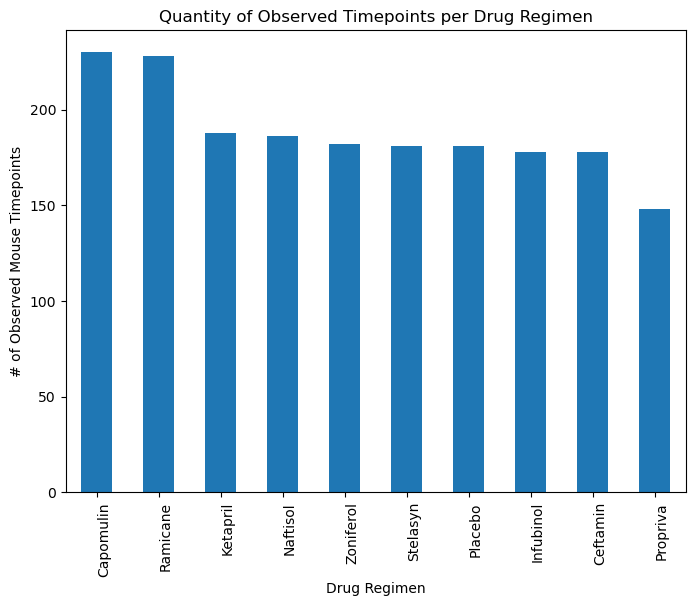

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_timepoints = cleaned_study["Drug Regimen"].value_counts()

figure_bar = drug_timepoints.plot(kind='bar', figsize=(8,6), 
                               title = "Quantity of Observed Timepoints per Drug Regimen",
                               xlabel = "Drug Regimen",
                               ylabel = "# of Observed Mouse Timepoints")

xticklabels = drug_timepoints.index
figure_bar.set_xticklabels(xticklabels, rotation=90, rotation_mode='anchor', ha='right')

plt.show()

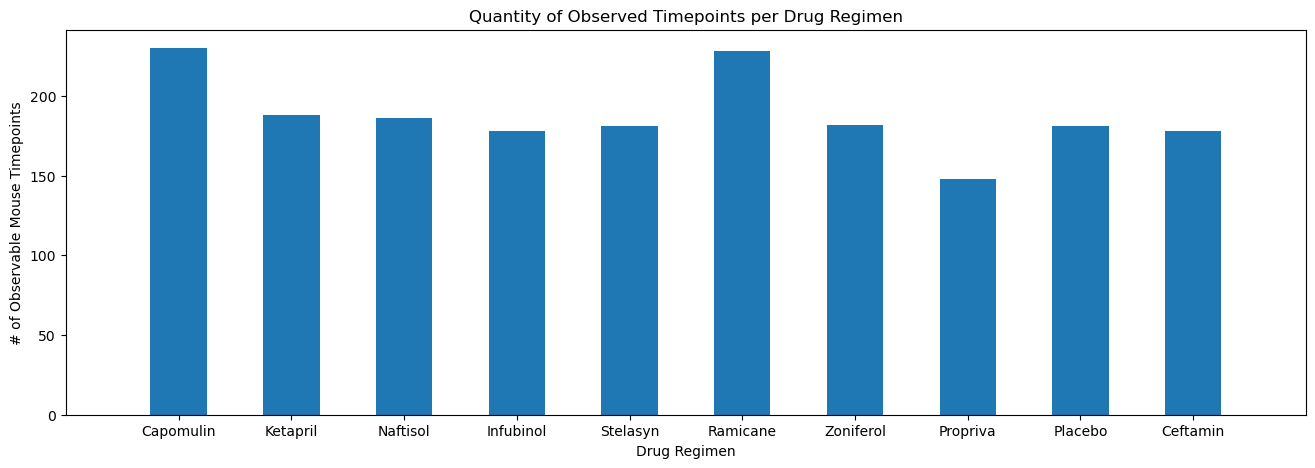

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_names = cleaned_study["Drug Regimen"]
drugs = len(cleaned_study["Drug Regimen"].value_counts())
bins = np.arange(drugs+1) - 0.25
plt.figure(figsize=(16,5))
plt.hist(drug_names, bins, width=.5, align="mid")
plt.xticks(range(drugs))
plt.xlim([-1, drugs])
plt.title('Quantity of Observed Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observable Mouse Timepoints')
plt.show()


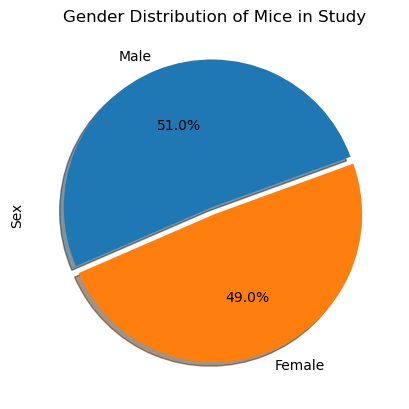

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = cleaned_study["Sex"].value_counts()

figure_pie = mouse_gender.plot(kind='pie', y="Sex", autopct="%1.1f%%", explode=(0.05,0), shadow=True, startangle=20)
figure_pie.set_ylabel("Sex")
figure_pie.set_title("Gender Distribution of Mice in Study")
plt.show()
                               

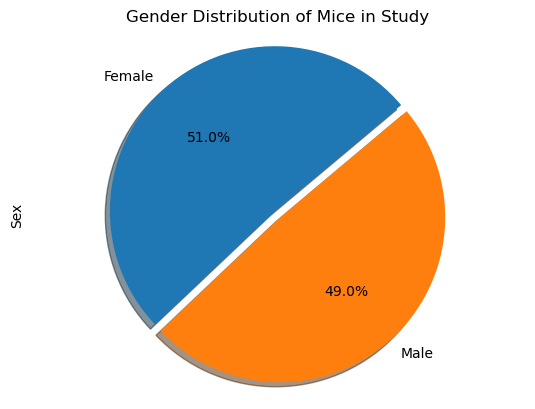

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = cleaned_study["Sex"].unique()
gender_counts = cleaned_study["Sex"].value_counts()
plt.pie(gender_counts, explode=(0.05, 0), labels=gender, autopct="%1.1f%%", shadow=True, startangle=40)
plt.ylabel("Sex")
plt.title("Gender Distribution of Mice in Study")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = cleaned_study.groupby(["Mouse ID"])["Timepoint"].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volumes = pd.merge(cleaned_study, max_time, on=["Mouse ID", "Timepoint"], how="inner")

tumor_volumes
       

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin_tumor = []
ramicane_tumor = []
infubinol_tumor = []
ceftamin_tumor = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in tumor_volumes.iterrows():
    
    if row["Drug Regimen"] == "Capomulin":

        capomulin_tumor.append(row["Tumor Volume (mm3)"])
    
    elif row["Drug Regimen"] == "Ramicane":

        ramicane_tumor.append(row["Tumor Volume (mm3)"])
    
    elif row["Drug Regimen"] == "Infubinol":

        infubinol_tumor.append(row["Tumor Volume (mm3)"])    

    elif row["Drug Regimen"] == "Ceftamin":

        ceftamin_tumor.append(row["Tumor Volume (mm3)"]) 

# Now that the lists for the treatments have been filled with final tumor volumes, I want to aggregate the lists and iterate through them, 
# comparing the final volumes to my quartile calculations.

all_lists = [pd.Series(capomulin_tumor), pd.Series(ramicane_tumor), 
             pd.Series(infubinol_tumor), pd.Series(ceftamin_tumor)]   
       
    # add subset 
for i,tumor in enumerate(all_lists):
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
     
    # This will print each treatment and any associated outliers based on the calculations. If nothing prints under a 
    # heading, it means no outliers were calculated. 
    
    print(f'============{treatments[i]}===============')
    
    for value in tumor:
        
        if value > upper_bound:

            print(f'The potential outliers for {treatments[i]} are {value}, which is above {upper_bound}.')
        
        elif value < lower_bound:

            print(f'The potential outliers for {treatments[i]} are {value}, which is below {lower_bound}.')
    

    
    


============Capomulin===============
============Ramicane===============
============Infubinol===============
The potential outliers for Infubinol are 36.3213458, which is below 36.83290494999999.
============Ceftamin===============


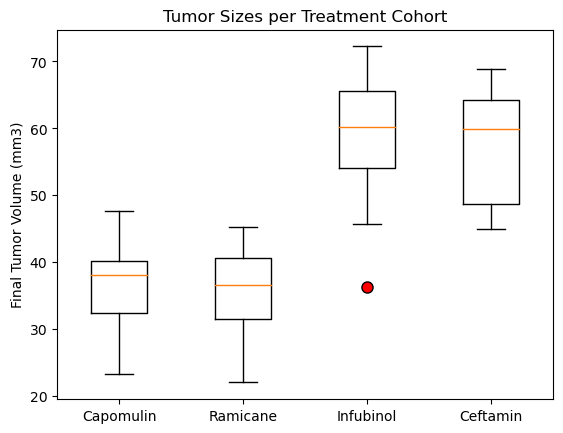

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Sizes per Treatment Cohort")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(all_lists, labels=treatments,showfliers=True, flierprops={'marker': 'o', 'markerfacecolor': 'red', 
                                                                      'markersize' : 8})
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

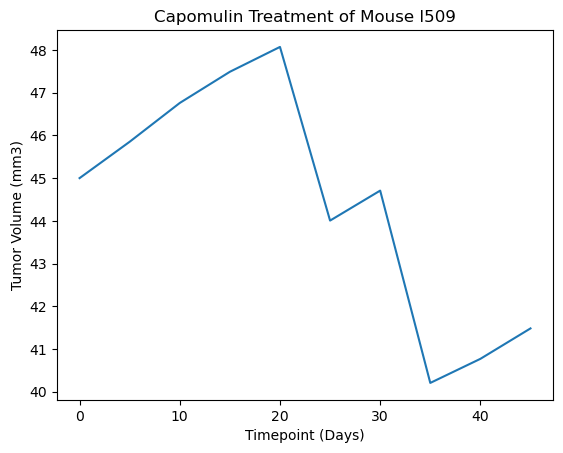

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

l509 = cleaned_study.loc[cleaned_study["Mouse ID"] == "l509"]
l509_time = l509["Timepoint"]
l509_tumor = l509["Tumor Volume (mm3)"]

plt.plot(l509_time, l509_tumor)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

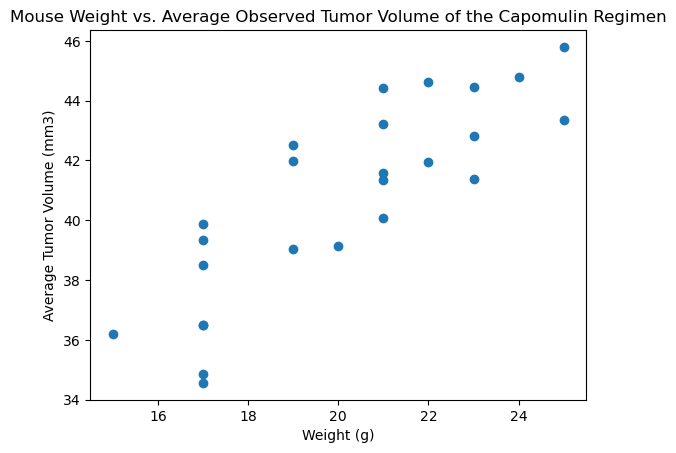

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cohort_tumor = cleaned_study.loc[cleaned_study["Drug Regimen"] == "Capomulin"]
tumor_size = cohort_tumor.groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean()

plt.scatter(tumor_size["Weight (g)"], tumor_size["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Observed Tumor Volume of the Capomulin Regimen")
plt.show()

## Correlation and Regression

0.8419363424694721


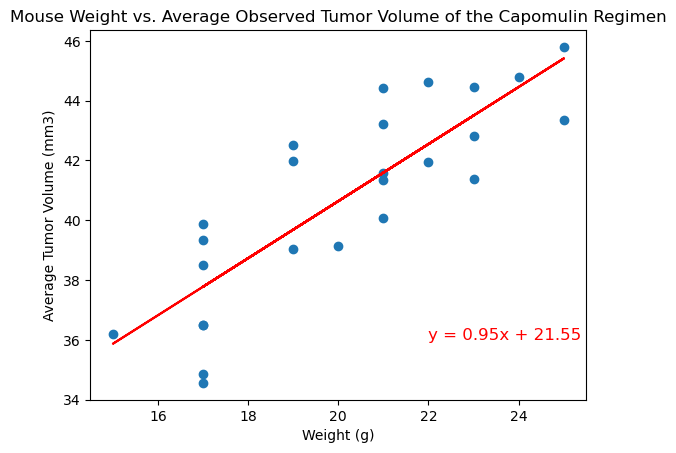

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

weight = tumor_size["Weight (g)"]
tumor = tumor_size["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(rvalue)
plt.scatter(weight, tumor)
plt.plot(weight, regress_values, "r-")
plt.annotate(line_eq, (22,36), fontsize=12, color="red")
plt.title("Mouse Weight vs. Average Observed Tumor Volume of the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()